In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Imports and displays dataset

d=pd.read_csv("C:\\Users\\LilyB\Desktop\\Household recycling.csv")
df=pd.DataFrame(d)

display(df.head())
print(df.shape)

'''
The recycling rate is calculated as set out below.

For Waste Collection Authorities (WCA) and Unitary Authorities (UA):
X/Y x 100, where:
X = Tonnage (weight in tons) of household waste collected by the WCA or UA which is sent for recycling/composting 
    (including private/voluntary collections of household waste for recycling)
Y = Total tonnage of household waste collected by the WCA or UA 
    (including private/voluntary collections of household waste for recycling)
'''

,Code,Area,Year,Recycling_Rates
0,E09000001,City of London,2003/04,8
1,E09000002,Barking and Dagenham,2003/04,5
2,E09000003,Barnet,2003/04,16
3,E09000004,Bexley,2003/04,21
4,E09000005,Brent,2003/04,10


(817, 4)


'\nThe recycling rate is calculated as set out below.\n\nFor Waste Collection Authorities (WCA) and Unitary Authorities (UA):\nX/Y x 100, where:\nX = Tonnage (weight in tons) of household waste collected by the WCA or UA which is sent for recycling/composting \n    (including private/voluntary collections of household waste for recycling)\nY = Total tonnage of household waste collected by the WCA or UA \n    (including private/voluntary collections of household waste for recycling)\n'

In [2]:
#Takes the total mean and median recycling rates
recycling_rates = df['Recycling_Rates']

print('Mean:',recycling_rates.mean())
print('Median:',recycling_rates.median())

#Calculates the interquartile range (IQR)
from scipy.stats import iqr

IQR = iqr(recycling_rates)

#Caculates the 1st (Q1) and 3rd (Q3) quartile      
q1=(np.quantile(recycling_rates,0.25))
q3=(np.quantile(recycling_rates,0.75))

#Calculates the outliers among the recycling rate array 
data = np.array(recycling_rates)

threshold= 1.5 * IQR
outliers = np.where((data < q1 - threshold) | (data > q3 + threshold))
print("Outliers of array:", np.sort(data[outliers]))

Mean: 31.769889840881273
Median: 32.0
Outliers of array: []


In [3]:
#Creates a groupby object for Area and finds the average recycling rate per borough

column_name = 'Recycling_Rates'
df.groupby('Area').mean().sort_values(by=column_name, ascending=True)

,Recycling_Rates
Area,
Newham,15.789474
Lewisham,19.157895
Westminster,20.315789
Tower Hamlets,20.631579
Wandsworth,22.894737
Hackney,23.052632
Barking and Dagenham,23.368421
Hammersmith and Fulham,24.157895
Redbridge,24.947368


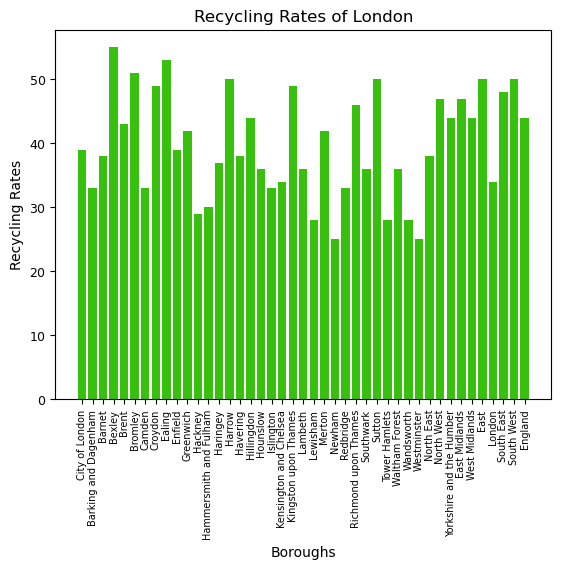

"\nCan't get the sort_values() to work with the recycling rates in order to display the values in ascending order.\nAlso, the y-axis isn't correct with the values, how did I fix this?\n"

In [8]:
#Creates a graph of the recycling rates of london
x_axis = df['Area']
y_axis = df['Recycling_Rates']#.sort_values()

plt.bar(x_axis, y_axis, color='#37C10E')
plt.title('Recycling Rates of London')
plt.xlabel('Boroughs')
plt.xticks(rotation = 90)
plt.xticks(fontsize = 7)
plt.ylabel('Recycling Rates')
plt.yticks(fontsize = 9)

plt.show()

'''
Can't get the sort_values() to work with the recycling rates in order to display the values in ascending order.
Also, the y-axis isn't correct with the values, how did I fix this?
'''